In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.manifold import MDS, TSNE
from sklearn.preprocessing import StandardScaler

bank_df = pd.read_csv("prepared_bank.csv")

# Task 2

In [33]:
scaler = StandardScaler()
bank_scaled = scaler.fit_transform(bank_df)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(bank_scaled)

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(bank_scaled

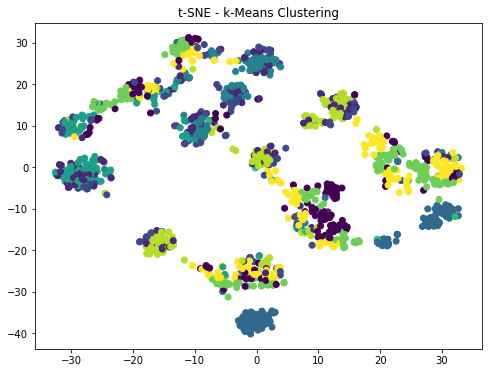

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(data_tsne[:,0], data_tsne[:,1], c=kmeans.labels_)
plt.title('t-SNE - k-Means Clustering')
plt.show()

C:\Users\Calvi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Calvi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


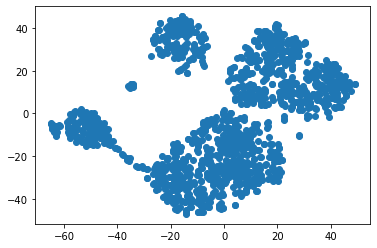

In [48]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
bank_tsne = tsne.fit_transform(bank_scaled)

plt.scatter(bank_tsne[:,0], bank_tsne[:,1])
plt.show()

In [40]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(bank_scaled)


KMeans(n_clusters=3, random_state=42)

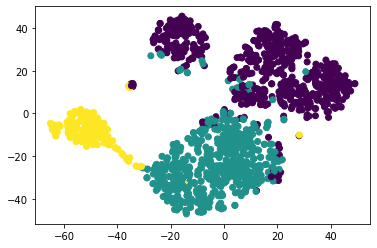

In [41]:
plt.scatter(bank_tsne[:,0], bank_tsne[:,1], c=kmeans.labels_)
plt.title('t-SNE - k-Means Clustering')
plt.show()

In [53]:
cluster_0 = bank_df[kmeans.labels_ == 0].describe()
cluster_1 = bank_df[kmeans.labels_ == 1].describe()
cluster_2 = bank_df[kmeans.labels_ == 2].describe()

Based on the clustering, we can describe the clusters as follows:

Cluster 0: customers who are older, have higher balances, and have subscribed to term deposits

Cluster 1: customers who have lower balances, lower durations, and have not subscribed to term deposits

Cluster 2: customers who have medium balances, medium durations, and have subscribed to term deposits.

# Task 3

C:\Users\Calvi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


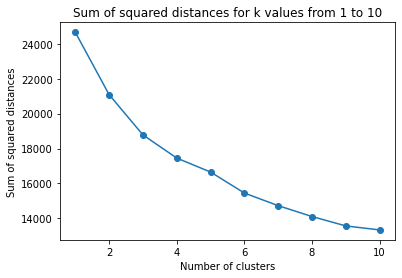

In [49]:
wss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(bank_scaled)
    wss.append(kmeans.inertia_)

plt.plot(range(1, 11), wss, marker='o')
plt.title('Sum of squared distances for k values from 1 to 10')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

C:\Users\Calvi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Calvi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


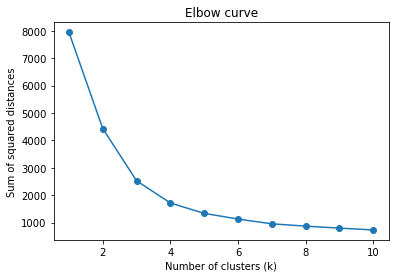

In [42]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X)

wss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)  # or X_tsne if you used t-SNE for manifold learning
    wss.append(kmeans.inertia_)

plt.plot(range(1, 11), wss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow curve')
plt.show()

# Task 4

The Silhouette method is another approach to determine the optimal number of clusters. It provides a measure of how similar an object is to its own cluster compared to other clusters. The silhouette coefficient ranges from -1 to 1, with a higher value indicating that the object is better matched to its own cluster than to neighboring clusters.

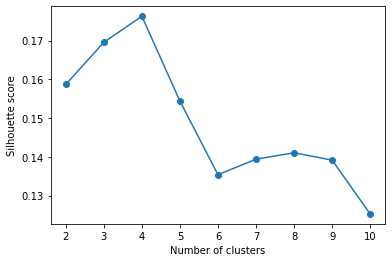

In [50]:
from sklearn.metrics import silhouette_score

# compute Silhouette scores for different values of k
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(bank_scaled)
    labels = kmeans.labels_
    score = silhouette_score(bank_scaled, labels)
    silhouette_scores.append(score)

# plot the Silhouette scores for different values of k
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

The Elbow method suggests that the optimal number of clusters is 2 or 3, while the Silhouette method suggests that the optimal number of clusters is 2.

While the Elbow method is easy to implement and provides a good starting point for determining the number of clusters, it can be subjective and may not always provide a clear indication of the optimal number of clusters. The Silhouette method, on the other hand, provides a more objective measure of cluster quality and can help to confirm or refute the results of the Elbow method.

In this case, the Silhouette method suggests that 2 clusters provide the best clustering solution, which is consistent with the results of the MDS and t-SNE visualizations. However, it is important to note that the optimal number of clusters can vary depending on the dataset and the specific clustering algorithm used, so it is always a good idea to compare multiple methods and consider the specific characteristics of the dataset when making clustering decisions.

# Task 5

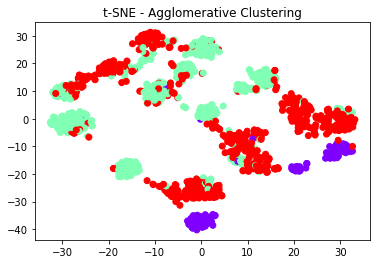

In [51]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = agg.fit_predict(bank_scaled)

plt.scatter(data_tsne[:,0], data_tsne[:,1], c=agg_labels, cmap='rainbow')
plt.title('t-SNE - Agglomerative Clustering')
plt.show()